## Importing Libraries

In [1]:
## Pandas and Numpy

import pandas as pd
import numpy as np

## Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

## Ignore warnings

import warnings
warnings.filterwarnings('ignore')

## Stats Libraries

from scipy.stats import zscore

## Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC


## Importing the Dataset

In [2]:
df = pd.read_csv("Part3 - vehicle.csv")
df.shape

(846, 19)

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

##### Checking for datatypes and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

##### Replacing missing values NaN with median of the respective columns


In [5]:
for i in df.columns[:-1]:
    df[i]=df[i].replace(np.nan,df[i].median())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

## Data Analysis and Visualization

##### Scaling data for easier boxplot analysis and to be used later for PCA as well

In [7]:
dfscaled = df.iloc[:,:-1].apply(zscore)

In [8]:
dfscaled['class'] = df['class']

##### Studying distributions of each of the variables

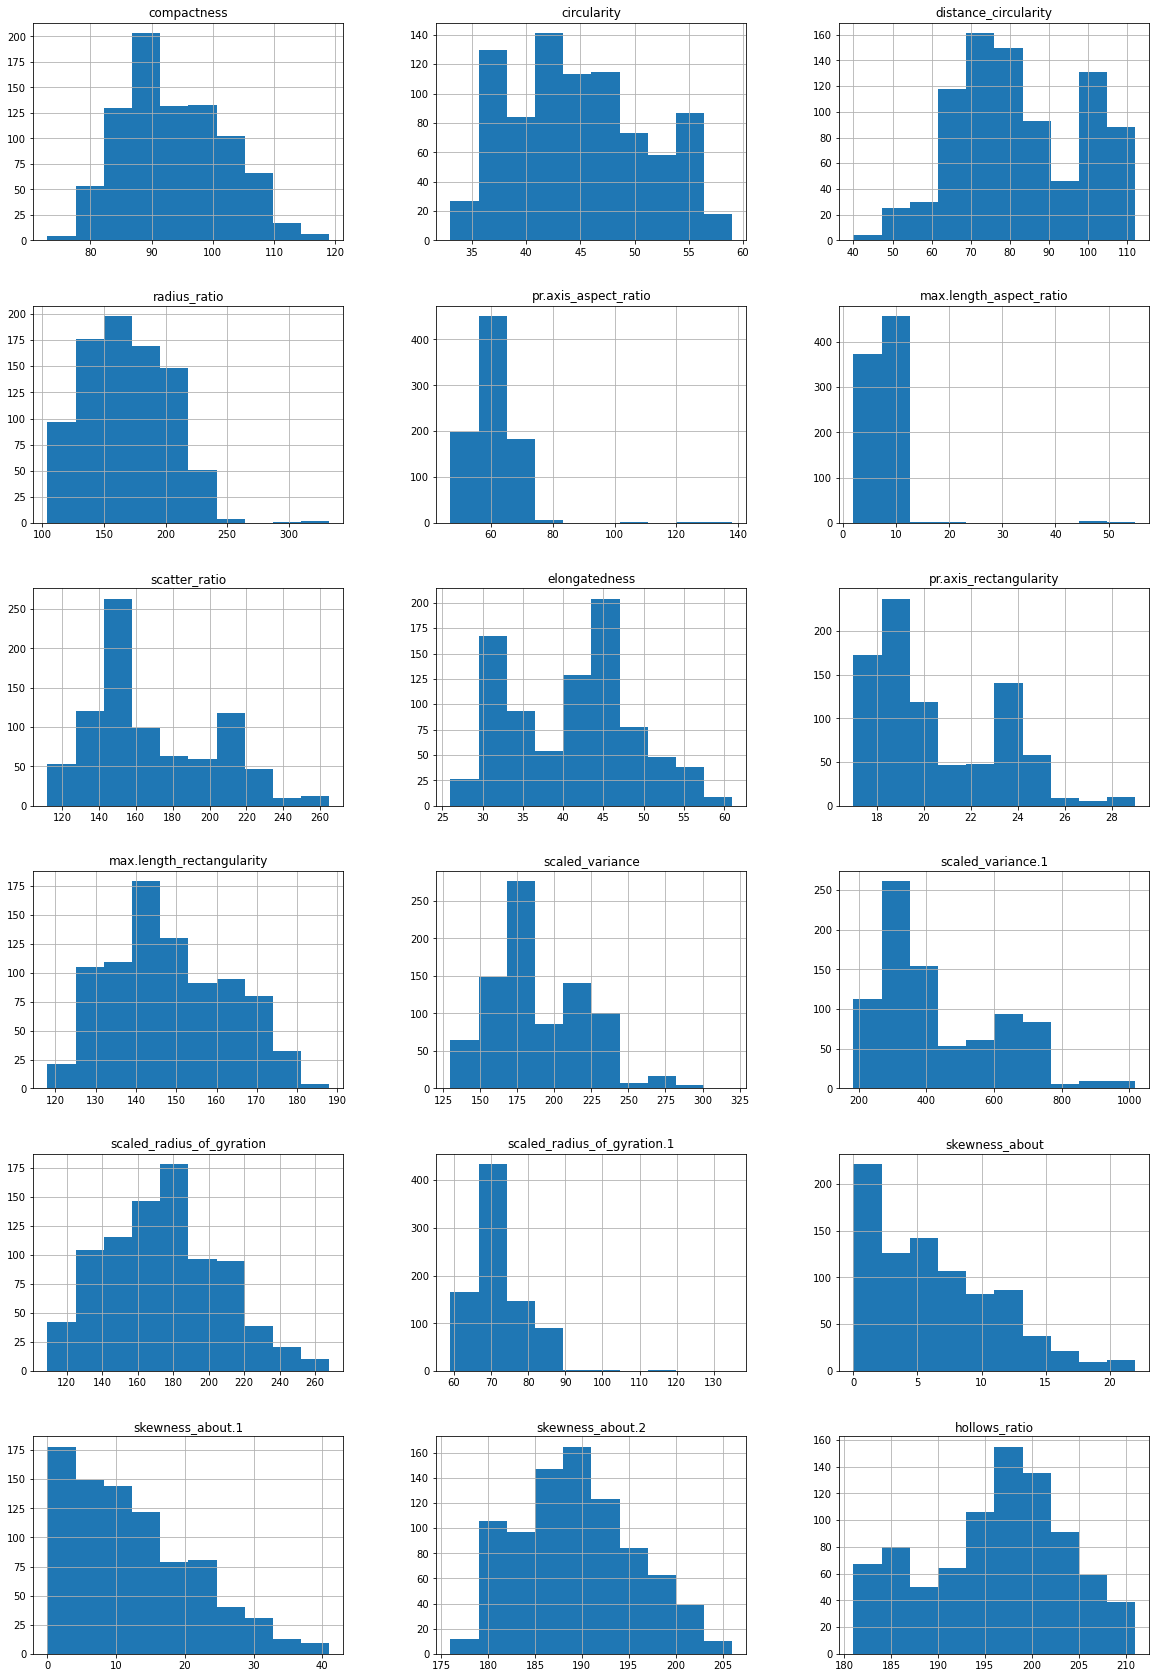

In [9]:
df.hist(layout= (6,3), figsize=(20,30));

##### Studying distributions of the different variables by categories of vehicles

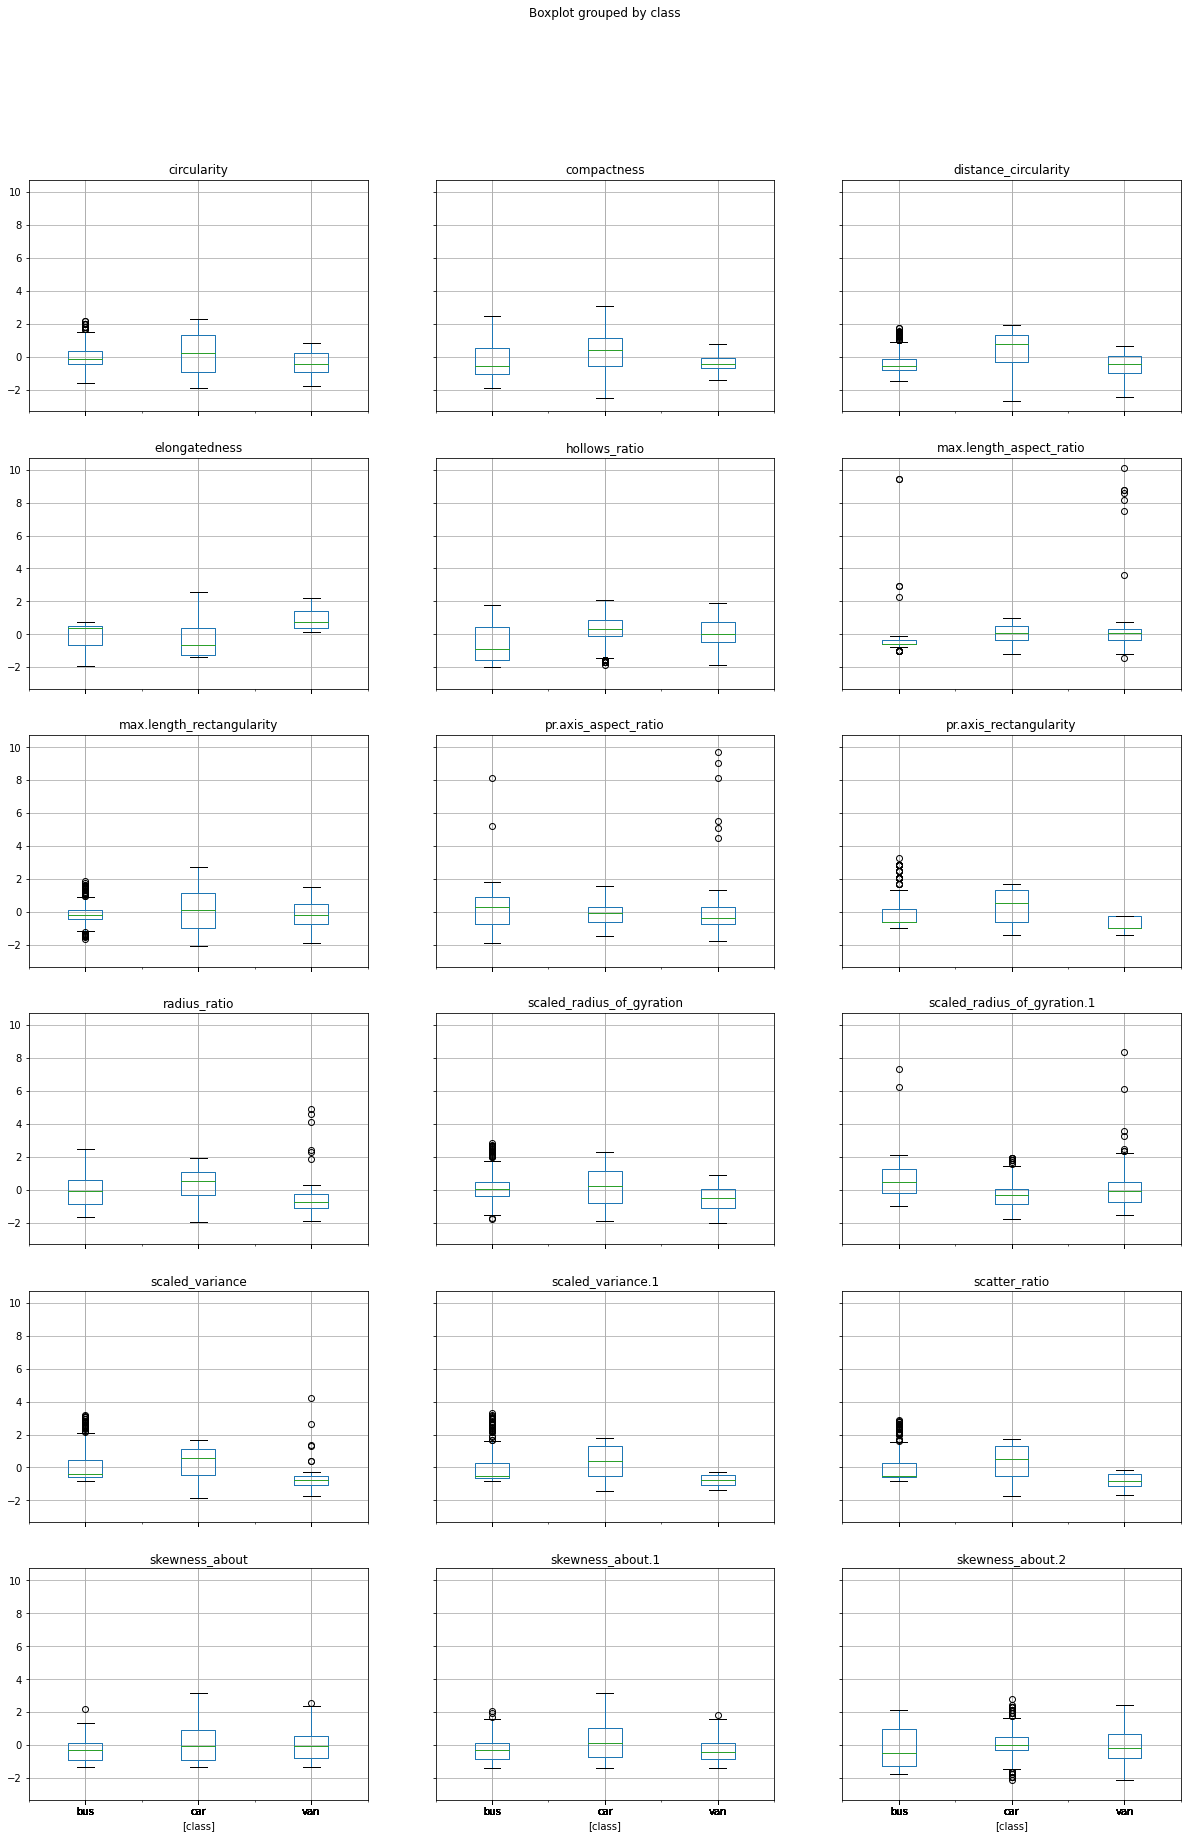

In [10]:
dfscaled.boxplot(by='class', layout= (6,3), figsize=(20,30));

##### We see that there is significant overlap between the different categories of vehicles on most variables therefore with just individual variables it may be difficult to identify the category of the vehicle

##### Creating the correlation matrix of the independent variables

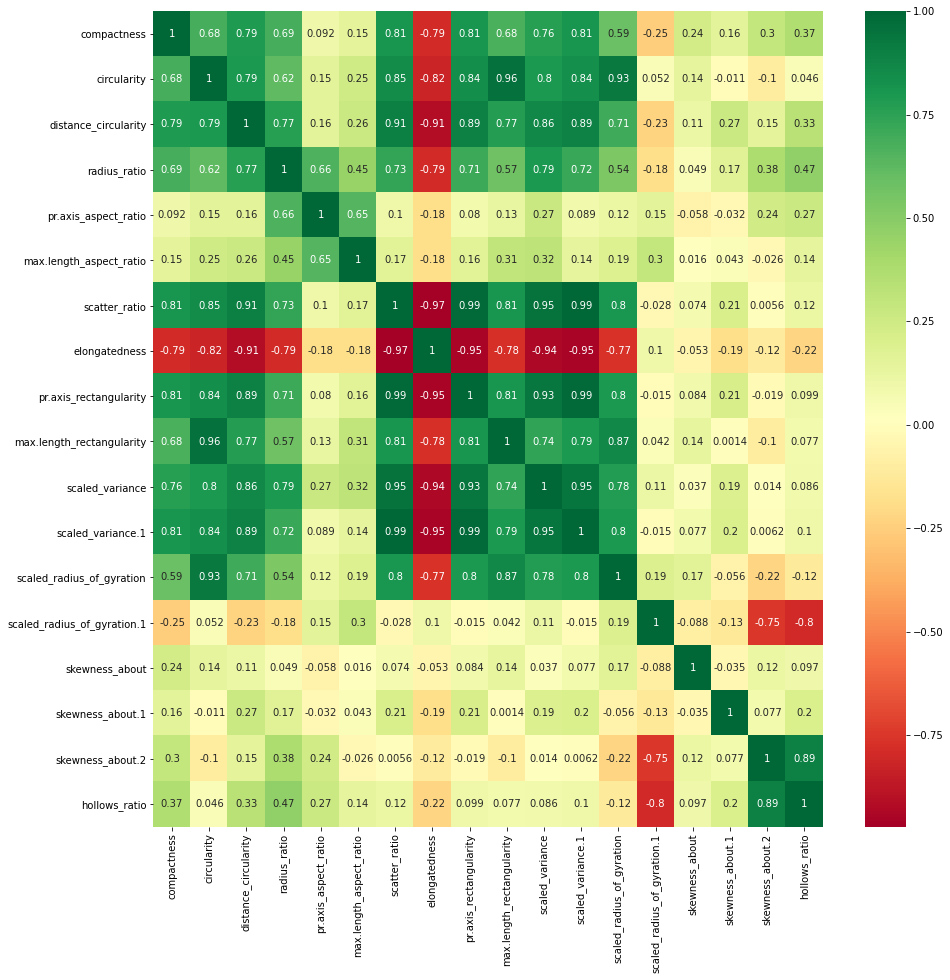

In [11]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn' )

plt.show()

##### We see that there are quite a few independent variables which are strongly correlated. This will lead to multicollinearity

##### 



##### Generating a pairplot to check all variables at one go

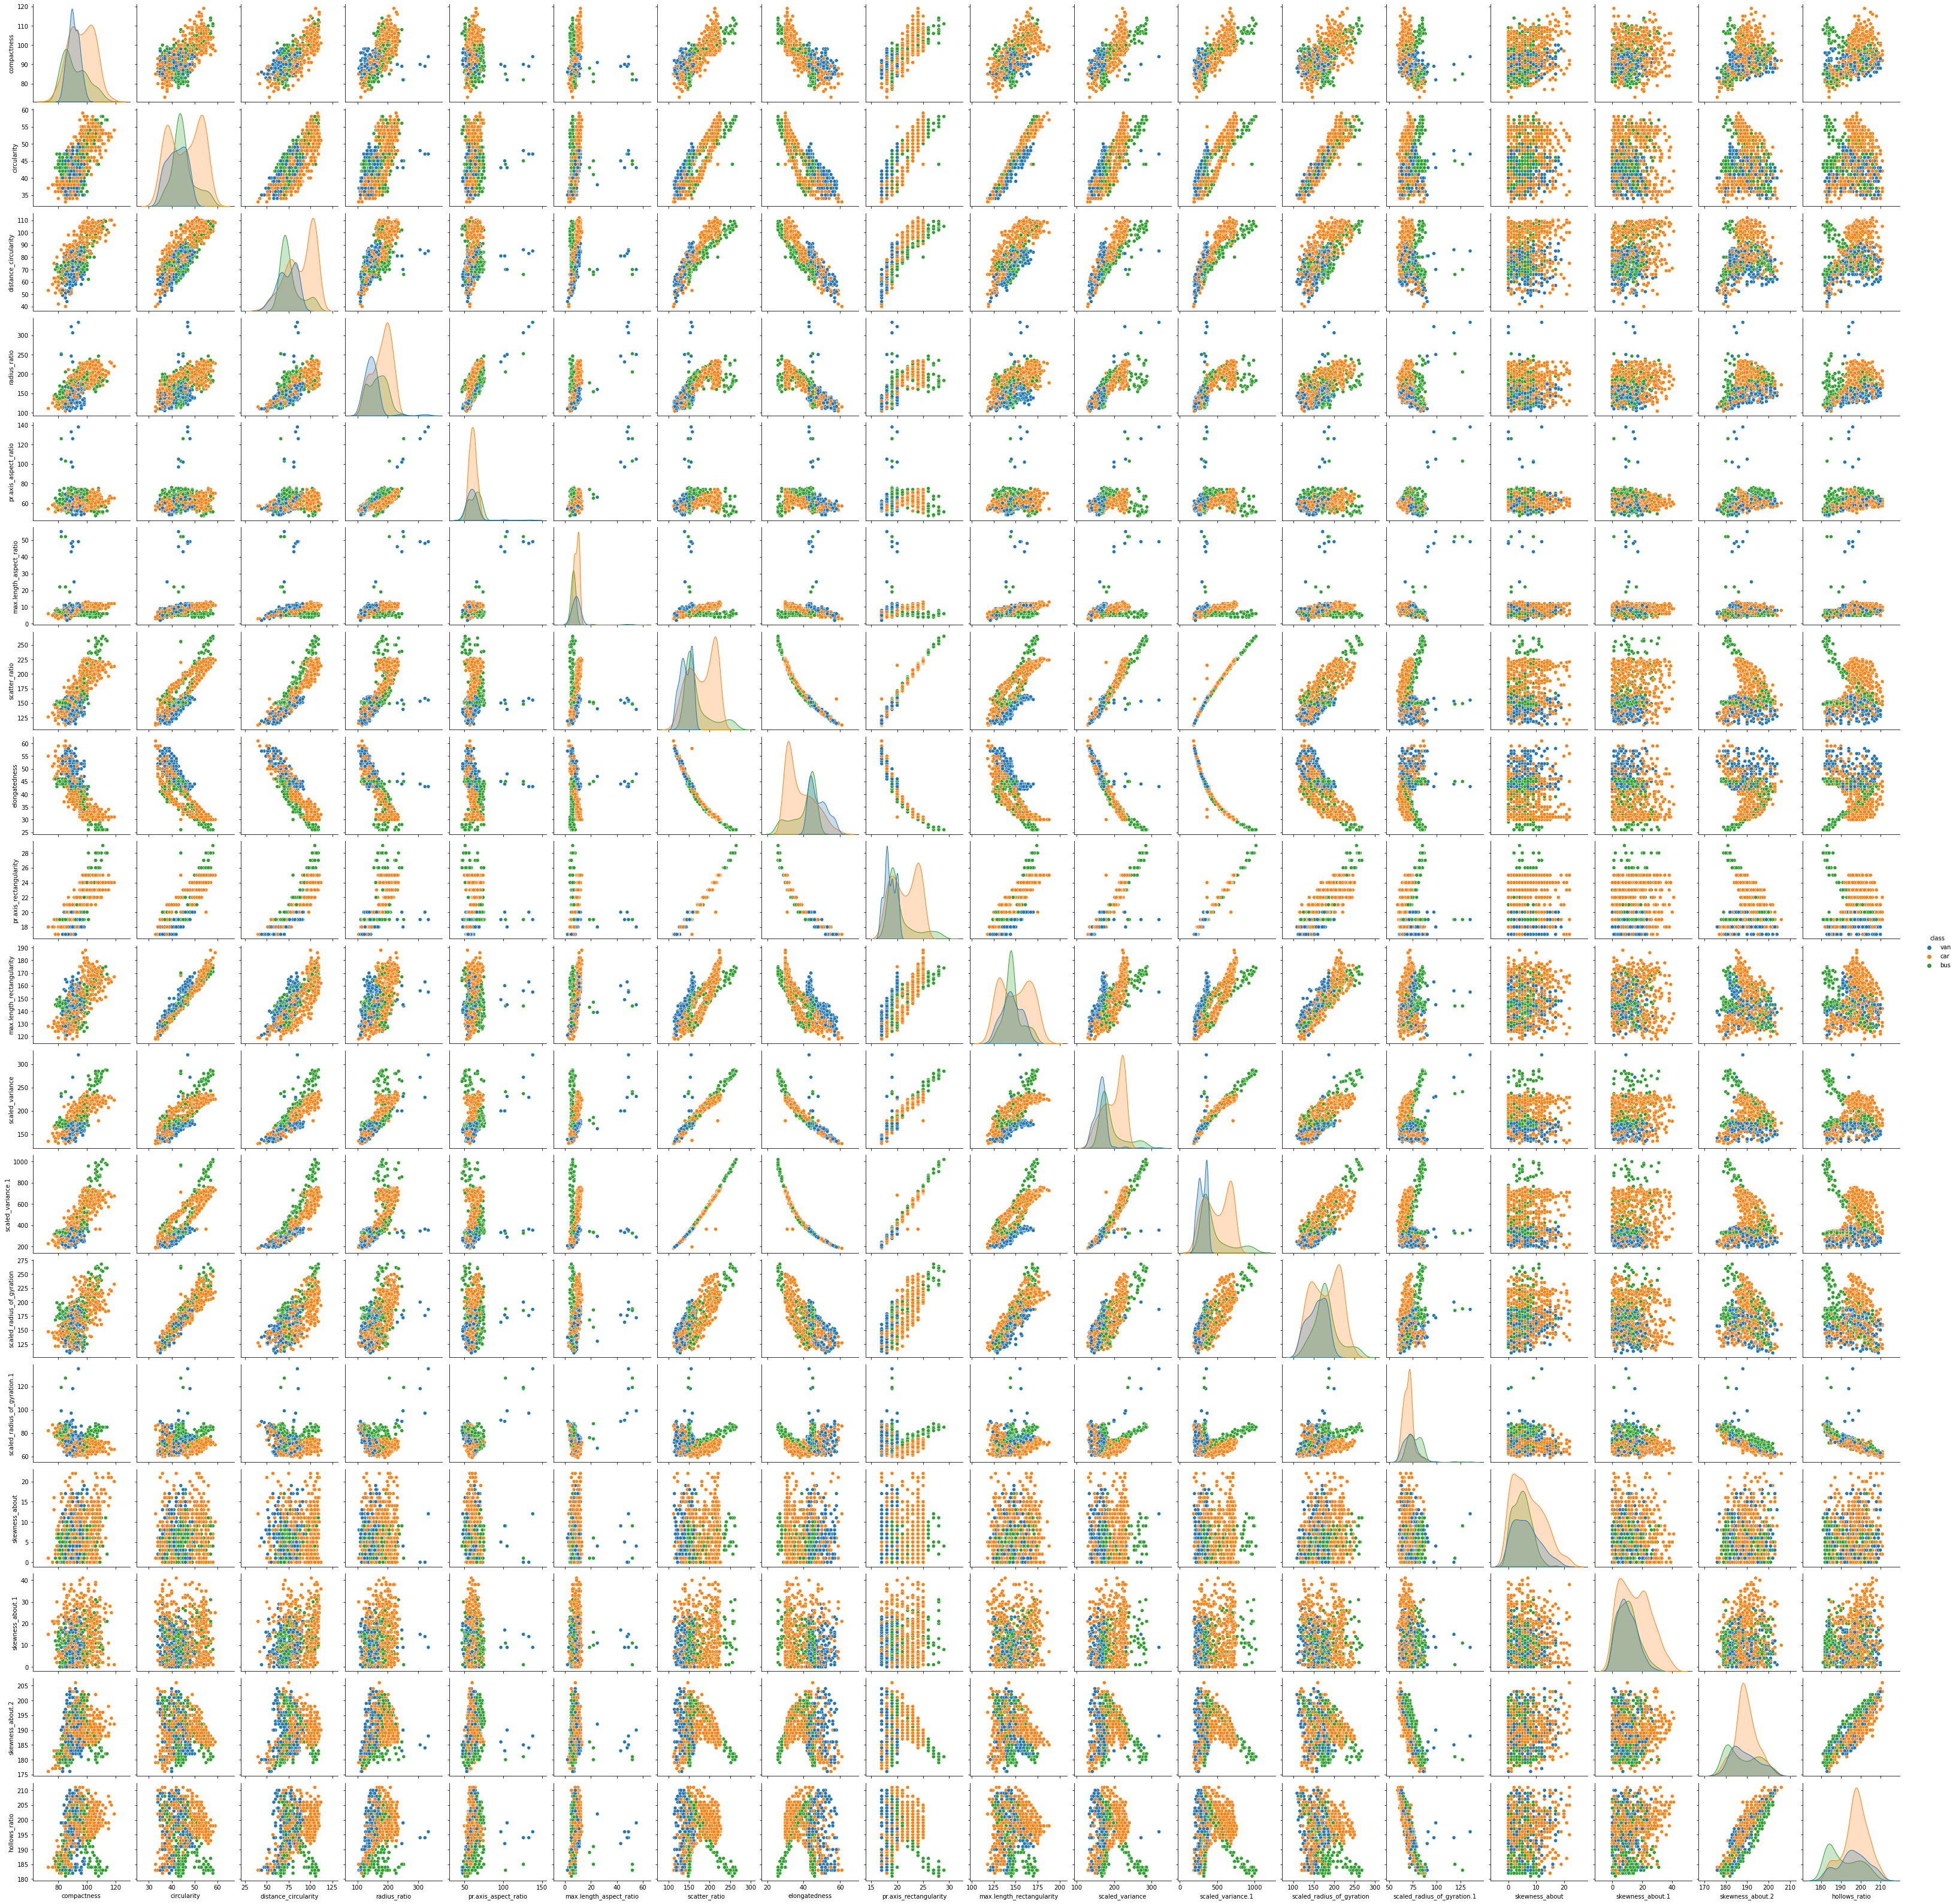

In [12]:
sns.pairplot(df, diag_kind='kde',hue = 'class');

## Building a classifier

##### Split Data into X variables and Target variables

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

##### Splitting into train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

##### Training a SVC classifier

In [15]:
model = SVC(gamma=0.01, C = 10)
model.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

In [16]:
y_pred = model.predict(X_test)

##### Model Score on Train set

In [17]:
model.score(X_train,y_train)

1.0

##### Model score on Test set

In [18]:
model.score(X_test,y_test)

0.5866141732283464

##### We see a huge drop in accuracy of the model. Indicating that the model was overfit.

##### Checking other metrics for accuracy of predictions on the Test set

In [19]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       1.00      0.27      0.42        78
         car       0.53      1.00      0.69       118
         van       1.00      0.17      0.29        58

    accuracy                           0.59       254
   macro avg       0.84      0.48      0.47       254
weighted avg       0.78      0.59      0.52       254



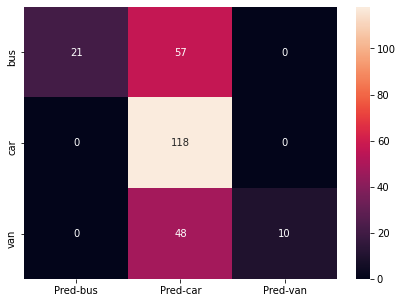

In [21]:
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, index = ['bus','car','van'], columns = ['Pred-bus','Pred-car','Pred-van'])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

##### We see that almost everything was predicted as a car

## Dimensionality Reduction

In [22]:
Xscaled = dfscaled.iloc[:,:-1]
Xscaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

##### Creating and printing the covariance matrix

In [23]:
covMatrix = np.cov(Xscaled,rowvar = False)
print(np.round(covMatrix,2))

[[ 1.    0.69  0.79  0.69  0.09  0.15  0.81 -0.79  0.81  0.68  0.76  0.81
   0.59 -0.25  0.24  0.16  0.3   0.37]
 [ 0.69  1.    0.79  0.62  0.15  0.25  0.85 -0.82  0.84  0.96  0.8   0.84
   0.93  0.05  0.14 -0.01 -0.1   0.05]
 [ 0.79  0.79  1.    0.77  0.16  0.26  0.91 -0.91  0.89  0.78  0.86  0.89
   0.71 -0.23  0.11  0.27  0.15  0.33]
 [ 0.69  0.62  0.77  1.    0.66  0.45  0.74 -0.79  0.71  0.57  0.79  0.72
   0.54 -0.18  0.05  0.17  0.38  0.47]
 [ 0.09  0.15  0.16  0.66  1.    0.65  0.1  -0.18  0.08  0.13  0.27  0.09
   0.12  0.15 -0.06 -0.03  0.24  0.27]
 [ 0.15  0.25  0.26  0.45  0.65  1.    0.17 -0.18  0.16  0.31  0.32  0.14
   0.19  0.3   0.02  0.04 -0.03  0.14]
 [ 0.81  0.85  0.91  0.74  0.1   0.17  1.   -0.97  0.99  0.81  0.95  0.99
   0.8  -0.03  0.07  0.21  0.01  0.12]
 [-0.79 -0.82 -0.91 -0.79 -0.18 -0.18 -0.97  1.   -0.95 -0.78 -0.94 -0.95
  -0.77  0.1  -0.05 -0.19 -0.12 -0.22]
 [ 0.81  0.84  0.89  0.71  0.08  0.16  0.99 -0.95  1.    0.81  0.94  0.99
   0.8  -0.02  0.08  0

In [24]:
pca = PCA(n_components=18)
pca.fit(Xscaled)

PCA(n_components=18)

In [25]:
print(np.round(pca.explained_variance_,2))

[9.4  3.01 1.9  1.18 0.92 0.54 0.36 0.22 0.16 0.09 0.07 0.05 0.04 0.03
 0.02 0.02 0.01 0.  ]


In [26]:
print(np.round(pca.explained_variance_ratio_,2))

[0.52 0.17 0.11 0.07 0.05 0.03 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.  ]


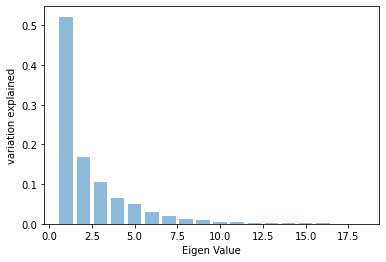

In [27]:
plt.bar(list(range(1,19)), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.ylabel('variation explained')
plt.xlabel('Eigen Value')
plt.show()

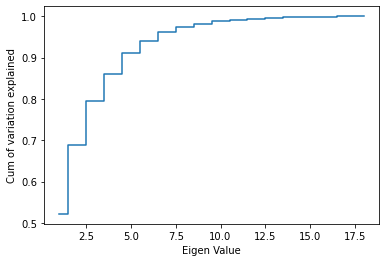

In [28]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

##### Seven Dimensions seem reasonable. They explain approximately 98% of the variation

In [29]:
pca7 = PCA(n_components=7)
pca7.fit(Xscaled)
print(np.round(pca7.components_,2),'\n')
print('The Eigen vectors','\n')
print(np.round(pca7.explained_variance_,2),'\n')
print('The Eigen values','\n')
Xpca7 = pca7.transform(Xscaled)

[[ 0.28  0.29  0.3   0.27  0.08  0.1   0.32 -0.31  0.31  0.28  0.31  0.31
   0.27 -0.02  0.04  0.06  0.03  0.07]
 [-0.13  0.13 -0.07 -0.19 -0.12  0.01  0.05  0.01  0.06  0.12  0.06  0.05
   0.21  0.49 -0.06 -0.12 -0.54 -0.54]
 [-0.12 -0.02 -0.06  0.28  0.64  0.59 -0.1   0.06 -0.11 -0.02  0.06 -0.11
  -0.03  0.29 -0.12 -0.08  0.01  0.04]
 [ 0.08  0.19 -0.07 -0.04  0.03  0.03 -0.1   0.08 -0.09  0.19 -0.12 -0.09
   0.2  -0.07  0.6  -0.67  0.11  0.05]
 [ 0.07 -0.09  0.04 -0.05 -0.04  0.21 -0.02  0.08  0.   -0.06 -0.   -0.02
  -0.06  0.15  0.73  0.6  -0.1  -0.03]
 [ 0.14 -0.3  -0.14  0.25  0.24 -0.42  0.12 -0.14  0.1  -0.46  0.24  0.16
  -0.14  0.24  0.2  -0.19  0.16 -0.24]
 [ 0.45 -0.25  0.07 -0.18 -0.4   0.5   0.06  0.01  0.1  -0.1   0.11  0.08
  -0.37  0.11 -0.08 -0.28  0.02  0.02]] 

The Eigen vectors 

[9.4  3.01 1.9  1.18 0.92 0.54 0.36] 

The Eigen values 



##### Displaying the transformed data with seven variables

In [30]:
print(np.round(Xpca7,2))

[[ 0.33 -0.22  1.   ...  0.08 -0.76 -0.9 ]
 [-1.59 -0.42 -0.37 ...  0.69 -0.52  0.38]
 [ 3.77  0.2   0.09 ...  0.73  0.71 -0.03]
 ...
 [ 4.81 -0.    0.53 ... -1.34 -0.22  0.57]
 [-3.29 -1.01 -0.36 ...  0.04 -0.4  -0.2 ]
 [-4.77  0.33 -0.57 ... -0.05 -0.34  0.06]]


##### Checking if multicollinearity has been removed.

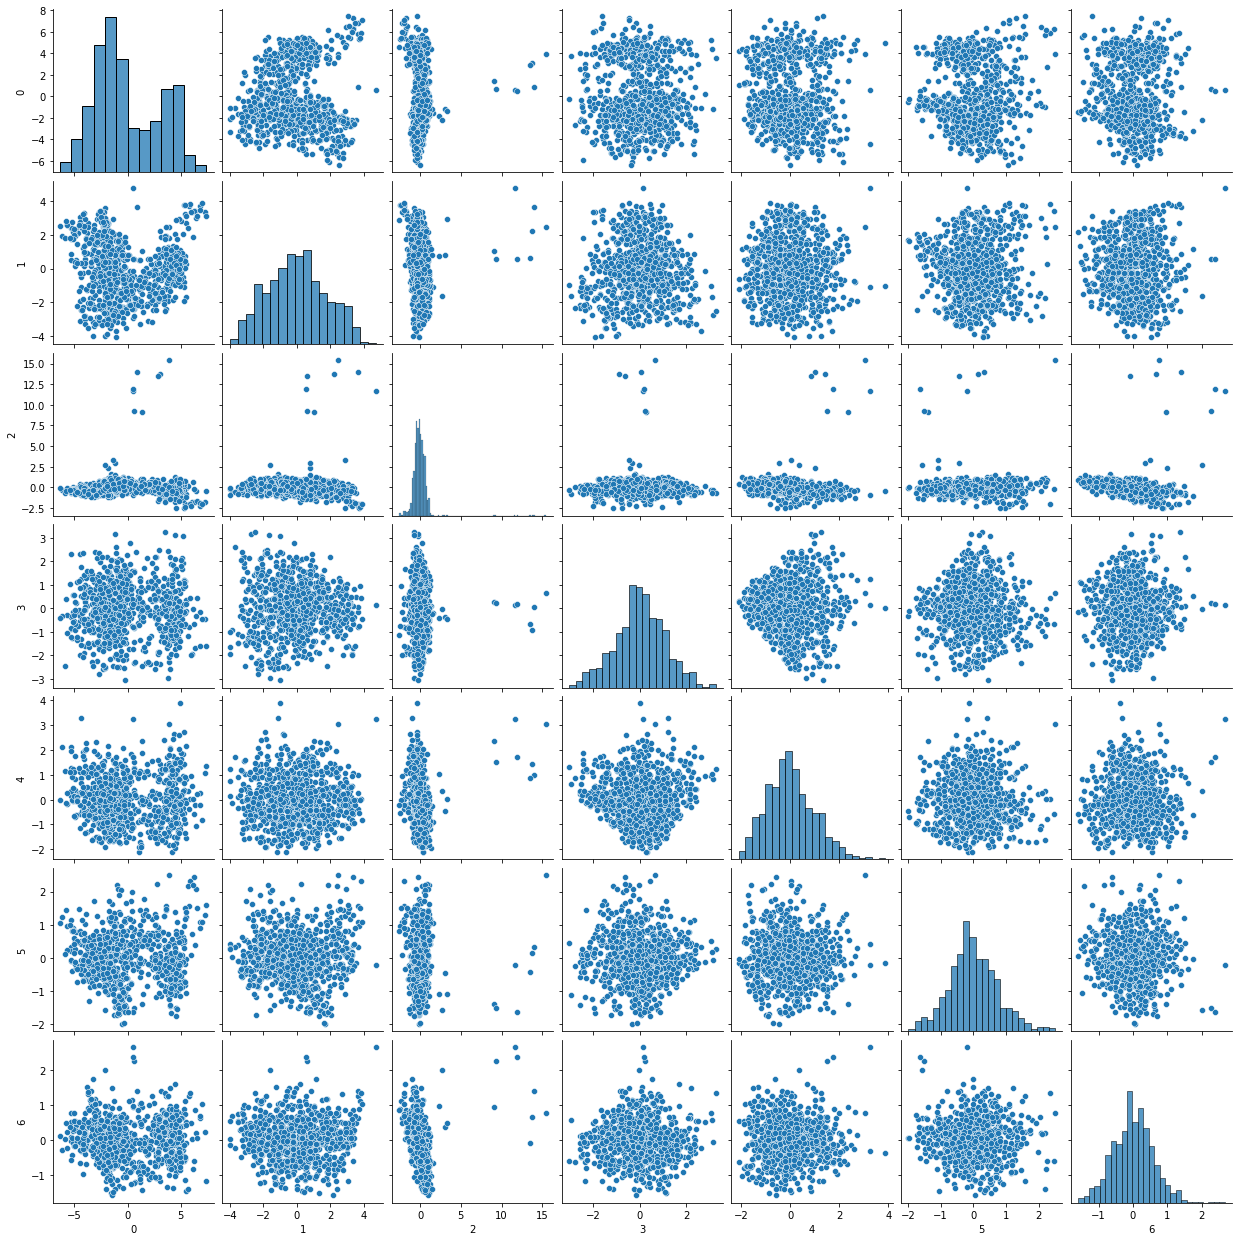

In [31]:
sns.pairplot(pd.DataFrame(Xpca7));

##### We see almost no correlations between with new variables

## Fitting SVC on dimensionally reduced variables

In [32]:
##Splitting data into train and test

Xpca7_train, Xpca7_test, y_train, y_test = train_test_split(Xpca7,y, test_size=.3, random_state=42)

final_model_pca = SVC(gamma=0.01,C=10)

final_model_pca.fit(Xpca7_train,y_train)
final_model_pca.score(Xpca7_train,y_train)

0.9239864864864865

In [33]:
final_model_pca.score(Xpca7_test,y_test)

0.9212598425196851

##### We see a significant improvement in model performance

In [34]:
y_pred = final_model_pca.predict(Xpca7_test)

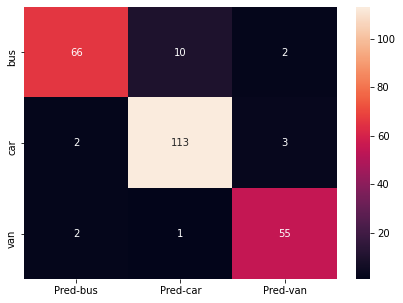

In [35]:
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, index = ['bus','car','van'], columns = ['Pred-bus','Pred-car','Pred-van'])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.94      0.85      0.89        78
         car       0.91      0.96      0.93       118
         van       0.92      0.95      0.93        58

    accuracy                           0.92       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.92      0.92      0.92       254



##### Overall we see a massive improvement in model performance due to PCA

## Conclusion

1. We saw that with 18 independent dimensions the model that was created was really overfit.
2. We also saw that there was high correlation between the independent variables that lead to multicollinearity

Both these aspects are taken care of when we reduce the dimensionality using Principal Component Analysis to seven dimensions.

1. Although there is some information loss, we are able to still get a good fit for the SVC model
2. We see that the model performance on test set is almost as good as the training set.

### These were the two key points how dimensionality reduction helped in this case.